<a href="https://colab.research.google.com/github/adeemadil/Colab-Notebooks/blob/main/Machine_Learning_HW3_SVM_%26_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1><center>CS 464</center></h1></b>
<b><h1><center>Introduction to Machine Learning</center></h1></b>
<b><h1><center>Spring 2021</center></h1></b>
<b><h1><center>Homework 3</center></h1></b>
<h4><center>Due: <b>10 May</b> (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks and SVM. </li>
    <li>
    You are not required to provide answers for <b>Question 1</b> on this notebook. You may use any programming language you like. In either case, you are required to prepare a report for Question 1, named <b>Q1_report.pdf</b>, which contains your results, plots and discussion for Question 1 only.
    </li>
    <li>
    You should implement <b>Question 2</b> on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    For question 1, you are <b>ALLOWED</b> to use machine learning libraries for training SVM models.
    </li>
    <li>
    For questions 2, you are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries included in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    <b>IMPORTANT:</b> If you are asked to discuss your results add a new text cell right after you provide your results. On the other hand, if you are asked to provide a written answer for a question add a text cell under the description of the corresponding question. 
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are <b>NOT ALLOWED</b> to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions regarding <b>question 1</b> you may send an email to <b>salman.mohammad@bilkent.edu.tr</b>.
    </li>
    <li> 
    If you have any questions regarding <b>question 2</b> you may send an email to <b>doruk.cakmakci@bilkent.edu.tr</b>.
    </li>
</ul>

## Environment Setup

This homework is prepared by using Google Colab which already has access to required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "package_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### PyTorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


# Question 1 [30 pts.]





Please refer to Q1.pdf for the question.

In [ ]:
import os
import csv
import math
import random
import operator
import pdb

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [ ]:
import sklearn.preprocessing

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/ML_HW3

Mounted at /content/drive
breast_cancer.csv  q2_dataset


In [ ]:
root = '/content/drive/MyDrive/ML_HW3'
q1_dataset_path = os.path.join(root, 'breast_cancer.csv')
breastcancer_data = pd.read_csv(q1_dataset_path)

## **1.1 SVM model with soft margin without using any kernels.**

In [ ]:
def k_folds_i(dataset, i, k):
  n = len(dataset)
  return len(dataset[n*(i-1)//k:n*i//k])

In [ ]:
def find_listOf_meanAvg(data_train = breastcancer_data[0:500], param_C = 1.0):
  #Constants
  K_FOLD = 10

  #Creating 10 folds
  count = 1
  s=0
  acc_total = 0

  while count!= K_FOLD + 1:
    #print("Fold ",count)
    folds = k_folds_i(data_train,count,10)
    d_fold = data_train[s:s + folds]
    
    d_test = d_fold
    X_test = d_test.iloc[:,0:8]
    y_test = d_test.iloc[:,8:10]
    d_train = data_train.drop(data_train.index[s:s+folds])
    X_train = d_train.iloc[:,0:8]
    y_train = d_train.iloc[:,8:10]
    
    X_train = X_train.to_numpy()
    X_train = sklearn.preprocessing.scale(X_train)

    y_train = y_train.to_numpy()

    X_test = X_test.to_numpy()
    X_test = sklearn.preprocessing.scale(X_test)

    y_test = y_test.to_numpy()

    y_train = np.array(y_train)

    svclassifier = SVC(C= param_C, kernel='linear')
    svclassifier.fit(X_train, y_train.ravel())
    
    y_pred = svclassifier.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)

    acc_total += accuracy
    s += folds
    count+=1

  acc_total /= K_FOLD
  return acc_total

In [ ]:
def optimized_C(data_train, listC):
  result = []
  max = 0
  for i in range(len(listC)):
    result.append( find_listOf_meanAvg(data_train, listC[i]))
  return result

In [ ]:
data_train = breastcancer_data[0:500]
data_test = breastcancer_data[500:]
listC = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
meanAvgC = optimized_C( data_train, listC)

Visualize optimal Cost-parameter


The optimum C value:  0.01 with mean average accuracy:  0.9399999999999998 %


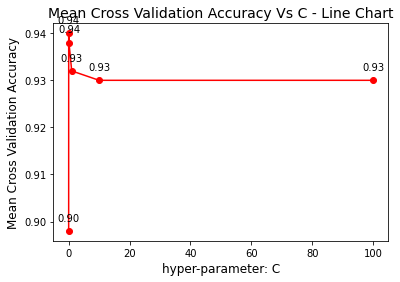

Text(0, 0.5, 'Mean Cross Validation Accuracy')

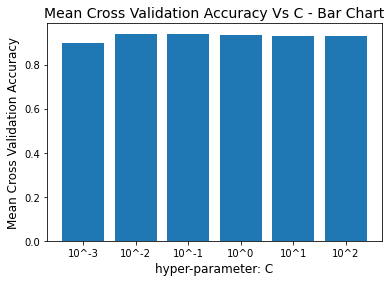

In [ ]:
print("The optimum C value: ", listC[np.argmax(meanAvgC)],  "with mean average accuracy: ", meanAvgC[np.argmax(meanAvgC)], "%")

plt.plot(listC,meanAvgC, color='red', marker='o')
for x,y in zip(listC,meanAvgC):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Mean Cross Validation Accuracy Vs C - Line Chart', fontsize=14)
plt.xlabel('hyper-parameter: C', fontsize=12)
plt.ylabel('Mean Cross Validation Accuracy', fontsize=12)
plt.show()
plt.bar( ['10^-3', '10^-2', '10^-1', '10^0', '10^1', '10^2'], meanAvgC)
plt.title('Mean Cross Validation Accuracy Vs C - Bar Chart', fontsize=14)
plt.xlabel('hyper-parameter: C', fontsize=12)
plt.ylabel('Mean Cross Validation Accuracy', fontsize=12)



Run SVM linear classifier model on test data after Parameter-Tuning (C is optimized)

In [ ]:
X_train = data_train.drop(labels='Class', axis=1)
X_test = data_test.drop(labels='Class', axis=1)
y_train = data_train['Class']
y_test = data_test['Class']

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       155
           1       0.96      1.00      0.98        44

    accuracy                           0.99       199
   macro avg       0.98      0.99      0.99       199
weighted avg       0.99      0.99      0.99       199

Accuracy:  0.9899497487437185
Confusion Matrix: 


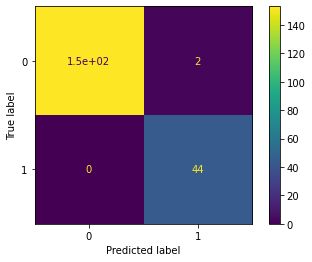

In [ ]:
optimal_C = listC[np.argmax(meanAvgC)]
svclassifier = SVC(C=optimal_C, kernel='linear')
svclassifier.fit(X_train, y_train.ravel())
y_pred = svclassifier.predict(X_test)
cM = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cM, display_labels=svclassifier.classes_)
disp.plot() 

print( "Accuracy: ", accuracy_score(y_test,y_pred))
print( "Confusion Matrix: ")

In [ ]:
cM = cM.ravel()
tp, tn, fn, fp = cM[3], cM[0], cM[2], cM[1]
print('TP: ', tp)
print('TN: ', tn)
print('FN: ', fn)
print('FP: ', fp)

precision = (tp/(tp + fp))
recall = (tp/(tp+fn))
FPR =(fp/(fp+tn))
F1 = (precision*recall)/(precision + recall)
F2 = (5*precision*recall)/(4*precision+recall)
FDR = (fp/(fp+tp))
NPV = (tn/(tn+fn))
print('Precision =',precision)
print('Recall =',recall)
print('Negative Predictive Value =',NPV)
print('False Positive Rate =',FPR)
print('False Discovery Rate =',FDR)
print('F1 =',F1)
print('F2=',F2)

TP:  44
TN:  153
FN:  0
FP:  2
Precision = 0.9565217391304348
Recall = 1.0
Negative Predictive Value = 1.0
False Positive Rate = 0.012903225806451613
False Discovery Rate = 0.043478260869565216
F1 = 0.4888888888888889
F2= 0.990990990990991


## **1.2 radial basis function (RBF) kernel to train hard margin SVM**

In [ ]:
def find_listOf_meanAvg_RBF(data_train = breastcancer_data[0:500], param_C = 1.0, param_Gamma='scale'):
  #Constants
  K_FOLD = 10

  #Creating 10 folds
  count = 1
  s=0
  acc_total = 0

  while count!= K_FOLD + 1:
    #print("Fold ",count)
    folds = k_folds_i(data_train,count,10)
    d_fold = data_train[s:s + folds]
    
    d_test = d_fold
    X_test = d_test.iloc[:,0:8]
    y_test = d_test.iloc[:,8:10]
    d_train = data_train.drop(data_train.index[s:s+folds])
    X_train = d_train.iloc[:,0:8]
    y_train = d_train.iloc[:,8:10]
    
    X_train = X_train.to_numpy()
    X_train = sklearn.preprocessing.scale(X_train)

    y_train = y_train.to_numpy()

    X_test = X_test.to_numpy()
    X_test = sklearn.preprocessing.scale(X_test)

    y_test = y_test.to_numpy()

    y_train = np.array(y_train)

    svclassifier = SVC(C= param_C, kernel='rbf', gamma=param_Gamma)
    svclassifier.fit(X_train, y_train.ravel())
    
    y_pred = svclassifier.predict(X_test)
    #print("Confusion Matrix:\n" , confusion_matrix(y_test,y_pred))
    #print(classification_report(y_test,y_pred))
    
    accuracy = accuracy_score(y_test,y_pred)

    acc_total += accuracy
    s += folds
    count+=1

  acc_total /= K_FOLD
  return acc_total

In [ ]:
def optimized_C_RBF(data_train, listC, listGamma):
  # result = []
  # for i in range(len(listC)):
  #   result.append( find_listOf_meanAvg(data_train, listC[i]))
  # return np.argmax(result), result
  result = []
  for C in listC:
    for gamma in listGamma:
        result.append( find_listOf_meanAvg_RBF(data_train, C, gamma))
  return result

In [ ]:
data_train = breastcancer_data[0:500]
data_test = breastcancer_data[500:]
c_range = [10**x for x in range(-3,3)] #[10^-3, 10^-2, 10^-1, 10^0, 10^1, 10^2]
gamma_range = [ 2**x for x in range(-4,2)] #[2^-4, 2^-3, 2^-2, 2^-1, 2^0, 2^1]
meanAvg_C_Gamma = optimized_C_RBF( data_train, c_range, gamma_range)

optimal_C_Gamma_Index = np.argmax(meanAvg_C_Gamma)
optimal_score = meanAvg_C_Gamma[optimal_C_Gamma_Index]
print( "The optimal score is ", optimal_score)

The optimal score is  0.9440000000000002


As we know that the nested loop runs for *C1 then Gamma1, Gamma2.... Gamma6 then for C2 it starts again* {as per the above lists c_range and gamma_range}.

#### Since index stars from zero in python and **optimal_score's index is 12**, it means that the 12th index would give the optimal values to be **C** = *10^-1*  and **Gamma** = *2^-4* .

In [ ]:
optimal_C = 10**(-1)
optimal_Gamma = 2**(-4)
svclassifier = SVC(C=optimal_C, gamma=optimal_Gamma)
svclassifier.fit(X_train, y_train.ravel())
y_pred = svclassifier.predict(X_test)
cM2 = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cM2, display_labels=svclassifier.classes_)
disp.plot() 

print( "Accuracy: ", accuracy_score(y_test,y_pred))
print( "Confusion Matrix: ")

In [ ]:
cM2 = cM2.ravel()
tp, tn, fn, fp = cM2[3], cM2[0], cM2[2], cM2[1]
print('TP: ', tp)
print('TN: ', tn)
print('FN: ', fn)
print('FP: ', fp)

precision = (tp/(tp + fp))
recall = (tp/(tp+fn))
FPR =(fp/(fp+tn))
F1 = (precision*recall)/(precision + recall)
F2 = (5*precision*recall)/(4*precision+recall)
FDR = (fp/(fp+tp))
NPV = (tn/(tn+fn))
print('Precision =',precision)
print('Recall =',recall)
print('Negative Predictive Value =',NPV)
print('False Positive Rate =',FPR)
print('False Discovery Rate =',FDR)
print('F1 =',F1)
print('F2=',F2)

TP:  44
TN:  150
FN:  0
FP:  5
Precision = 0.8979591836734694
Recall = 1.0
Negative Predictive Value = 1.0
False Positive Rate = 0.03225806451612903
False Discovery Rate = 0.10204081632653061
F1 = 0.47311827956989244
F2= 0.9777777777777776


# Question 2 [70 pts.]

Computer vision (CV) is the field of study which deals with how computers can gain high-level understanding from digital images or videos. For this question you will develop neural network models to classify images. You are encouraged to use GPU for model training. Here you will use a subset of Fashion-MNIST dataset for evaluating your networks. 

Fashion-MNIST dataset is composed of: (i) a training set of 60,000 images; and (ii) a test set of 10,000 images. These images are grayscale and have a size of 28x28. Each image belongs to one of the following categories: T-shirt/Top (Class 0), Trouser (Class 1), Pullover (Class 2), Dress (Class 3), Coat (Class 4), Sandal (Class 5), Shirt (Class 6), Sneaker (Class 7), Bag (Class 8) and Ankle boot (Class 9). For this question you will use half of the images in the official training set for training and validating your models, which we will refer to as the development dataset. Furthermore, you will evaluate your trained models on the test dataset. Both development and test datasets are provided to you as a pickled Python dictionary in _q2_dataset_. Keys of the dictionary are the following:
*   *development_x*: 30,000 images for training and validating models.
*   *development_y*: Class labels for the images in development set.
*   *test_x*: 10,000 images for testing the models.
*   *test_y*: Class labels for the images in the test set.
*   *label2name*: a list whose elements are class names (e.g. Class 0 corresponds to the first element and contains "T-shirt").

Libraries that are required in this question is given in the following code cell.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/ML_HW3

import pdb
import pickle
from time import time

import os
import csv
import math
import random
import operator
import pdb
import matplotlib
import matplotlib.image as mpimg
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from torchvision import transforms

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from time import time

torch.manual_seed(6)
torch.cuda.manual_seed(6)
np.random.seed(6)

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.

Mounted at /content/drive
breast_cancer.csv  q2_dataset


### Data Loader [5 pts.]

An important part of such a task is to implement your own data loader. In this part, you will implement the <b>FashionMNISTDataset</b> class, which inherits from the Dataset class in PyTorch library. This class partially provided to you below.  You need to complete the code below to create your custom <b>FashionMNISTDataset</b> class which will be able to load your dataset. Implement the functions whose prototypes are given. Follow the TODO notes below. You have to divide the development set into <b>training (80%)</b> and <b>validation (20%)</b> sets.  These non-overlapping splits and the test split as well as the list stored at the "label2name" field of the dataset dictionary should be retrieved using the <b>create_dataset</b> function. You should create instances of FashionMNISTDataset for each split.  Since this data loader will be called to get the input for different models, your function should work in a least two modes:
1. To be compatible with MLP, you need to flatten the images.
<br>
2. To be compatible with CNN, you need to resize the image to 1x28x28. Note that, you **should not** flatten the image in this mode.

Hint 1: The dataset is not normalized and your results will heavily depend on your input.

In [ ]:
#Change your root path accordingly
root = '/content/drive/MyDrive/ML_HW3'
q2_dataset_path = os.path.join(root, 'q2_dataset')

In [ ]:
class FashionMNISTDataset(Dataset):
  # TODO:
  """Define constructor for FashionMNISTDataset class
  HINT: You can pass processed data samples and their ground truth values as parameters"""
  def __init__(self, data, labels=None, transforms=None): # you are free to change parameters
    self.X = data
    self.Y = labels
    self.transforms = transforms
 
  '''This function should return sample count in the dataset'''
  def __len__(self):
    return len(self.X)
 
  '''This function should return a sample and its ground truth value from the dataset corresponding to index parameter '''
  def __getitem__(self, index):
    data = self.X[index, :]    
    
    if self.transforms:
        data = self.transforms(data)
        
    if self.Y is not None:
        return (data, self.Y[index])
    else:
        return data

In [ ]:
def create_dataset(path_to_dataset_file, mode):
  # TODO: 
  # Read dataset files using pickle library
  # Construct training, validation and test sets and return them
  with open(path_to_dataset_file, 'rb') as file_to_read:
    loaded_dictionary = pickle.load(file_to_read, encoding='bytes')

  label2name = loaded_dictionary['label2name']
  X_train_dataset, X_vald_dataset, y_train_dataset, y_vald_dataset = train_test_split(loaded_dictionary['development_X'], loaded_dictionary['development_y'], test_size=0.2) 
  test_dataset = loaded_dictionary['test_X']
  test_labels = loaded_dictionary['test_y']

  if mode=='MLP':
    X_train_dataset.flatten()
    X_vald_dataset.flatten()
    test_dataset.flatten()
  if mode=='CNN':
    # converting training images into torch format
    X_train_dataset = X_train_dataset.reshape(24000, 1, 28, 28)
    X_train_dataset  = torch.from_numpy(X_train_dataset)

    # converting the target into torch format
    y_train_dataset = y_train_dataset.astype('int');
    y_train_dataset = torch.from_numpy(y_train_dataset)

    # converting validation images into torch format
    X_vald_dataset = X_vald_dataset.reshape(6000, 1, 28, 28)
    X_vald_dataset  = torch.from_numpy(X_vald_dataset)

    # converting the target into torch format
    y_vald_dataset = y_vald_dataset.astype('int');
    y_vald_dataset = torch.from_numpy(y_vald_dataset)

    
    # converting test images into torch format
    test_dataset = test_dataset.reshape(10000, 1, 28, 28)
    test_dataset  = torch.from_numpy(test_dataset)

    # converting the target into torch format
    test_labels = test_labels.astype('int');
    test_labels = torch.from_numpy(test_labels)

  return X_train_dataset, X_vald_dataset, y_train_dataset, y_vald_dataset, test_dataset, label2name, test_labels

### Model Implementation [15 pts.]

#### Multi Layer Perceptron (MLP) [5 pts.]
Now, implement your three layer neural network (i.e. one input and two hidden layers). MLP class, whose template is given below, will represent your neural network. First and second hidden layers will have 256 and 64 neurons, respectively. You will decide on the number of input and output neurons. Use ReLU as your hidden layer activation function. You need to pick a proper activation function for the output layer and a proper weight initialization scheme for fully-connected layers.

In [ ]:
class MLP(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here
      super(MLP, self).__init__()

      self.fc1 = nn.Linear(28*28, 256)
      # linear layer (n_hidden -> hidden_2)
      self.fc2 = nn.Linear(256, 64)
      # linear layer (n_hidden -> 10)
      self.fc3 = nn.Linear(64, 10)
      nn.init.kaiming_uniform_(self.fc1.weight)
      nn.init.kaiming_uniform_(self.fc2.weight)
      nn.init.kaiming_uniform_(self.fc3.weight)

    def forward(self, X): # you can add any additional parameters you want
    # TODO:
    # Forward pass implementation should be here
      X = torch.flatten(X, 1) # flatten all dimensions except the batch dimension
      X = F.relu(self.fc1(X))
      X = F.relu(self.fc2(X))
      X = F.relu(self.fc3(X))
      return X

#### Convolutional Neural Network (CNN) [10 pts]

Now implement your convolutional neural network. CNN class, whose template is given below, will represent your convolutional neural network. Your network will have several convolutional layers followed by a fully-connected classification layer. This model utilizes batch normalization which helps to  stabilize the learning process and dramatically reduces the number of training epochs required to train deep networks. You need to choose appropriate input and output neuron sizes, and  activation functions for the fully-connected layers. The architecture can be summarised as follows:
<ul>
  <li> 64 filters with size of 2 x 2 with stride 1 and zero padding to both sides, ReLU </li>
  <li> 2 x 2 max pool. </li>
  <li> 128 filters with size of 2 x 2 with stride 1 and zero padding to both sides, Batch Normalization, ReLU </li>
  <li> 2 x 2 max pool. </li>
  <li> Fully-connected layer </li>
</ul>



In [ ]:
class CNN(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here
      super(CNN, self).__init__()

    #CNN Layers
      # self.layers = nn.Sequential(
      #   #Layer 1
      #   nn.Conv2d(in_channels=1, out_channels=64, kernel_size=(2,2), stride=1),
      #   nn.ReLU(),
      #   nn.MaxPool2d(kernel_size=(2,2)),
      #   #Layer 2
      #   nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(2,2), stride=1),
      #   nn.BatchNorm2d(128),
      #   nn.MaxPool2d(kernel_size=(2,2)), 
      #   nn.ReLU()
      # )
      # self.fc_layer = nn.Sequential(
      #     nn.Linear(28*28*128,10),
      #     nn.ReLU()
      # )
      self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=(2,2), stride=1)
      self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(2,2), stride=1)
      self.conv2_bn = nn.BatchNorm2d(128)
      self.maxp = nn.MaxPool2d(2)
      self.fc = nn.Linear(4608,10)
      self.relu = nn.ReLU(inplace=True)

    def forward(self, x): # you can add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here
      # X = self.layers(X)
      # X = X.view( X.size(0), -1)
      # X = self.fc_layer
      x = self.conv1(x)
      #print(x.shape)
      x = F.relu(x)
      #print(x.shape)
      x = F.max_pool2d(x, 2)
      #print(x.shape)
      x = self.conv2(x)
      #print(x.shape)
      x = self.conv2_bn(x)
      #print(x.shape)
      x = F.relu(x)
      #print(x.shape)
      x = F.max_pool2d(x,2)
      #print(x.shape)
      x = torch.flatten(x, 1)
      #print('After flatten', x.shape)
      x = self.fc(x)
      #print('FC layer: ',x.shape)
      x = F.relu(x)
      #print(x.shape)
      output = F.log_softmax(x, dim=1)
      #print(output.shape)
      return output

  ### Model Training [20 pts.]

Train both models for 50 epochs with properly processes inputs (i.e. call create_dataset function in mode "mlp" for MLP model and mode "cnn" for CNN model). Experiment with several optimizers including Stochastic Gradient Descent(SGD), SGD with momentum and Adam. Tune your learning rate. Save your best models (i.e. MLP and CNN models with highest performance) as "best_mlp.pth" and "best_cnn.pth", respectively. You may use any performance metric to compare performance of the models. However, you must explain your reasoning behind selected optimizer and model. During training you are expected to plot two properly formatted figures per model:
<ol>
<li>Training and validation losses vs. epochs</li>
<li>Accuracy calculated on training and validation sets vs. epoch. 
</ol>

Hint 1: Training the models on CPU should not take days. You are encouraged to train the models on GPU (Runtime > Change Runtime Type). 
Hint 2: Select batch size mindfully in order to train the models in a reasonable time.


#### Train MLP [8 pts]

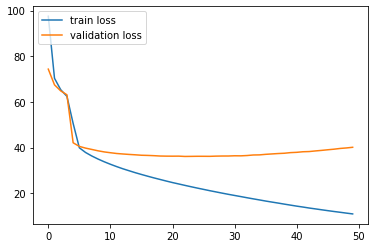

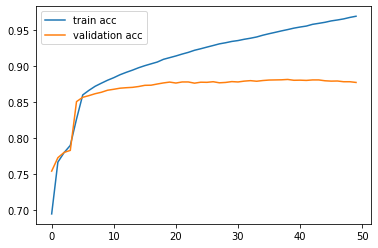

In [ ]:
# HINT: note that your training time should not take many days. You may consider training on GPU.
 
# TODO:
# Pick your hyper parameters
max_epoch = 50
train_batch = 32
test_batch = 32
learning_rate = 0.001
 
use_gpu = torch.cuda.is_available()
 
#We Transform for Normalizations
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
 
X_train_dataset, X_vald_dataset, y_train_dataset, y_vald_dataset, test_x, label2name, test_y = create_dataset( q2_dataset_path, 'MLP')
# Create train dataset loader
train_dataset = FashionMNISTDataset(X_train_dataset, y_train_dataset, transforms=transform)
train_loader = DataLoader(train_dataset, batch_size=train_batch)
 
# Create validation dataset loader
vald_dataset = FashionMNISTDataset(X_vald_dataset, y_vald_dataset, transforms=transform)
vald_loader = DataLoader(vald_dataset, batch_size=train_batch)
 
# Create test dataset loader
test_dataset = FashionMNISTDataset(test_x, test_y, transforms=transform)
test_loader = DataLoader(test_dataset, batch_size=test_batch)
 
# initialize your network
model = MLP()
 
if use_gpu:
  model.cuda()
 
# define loss function
criterion = nn.CrossEntropyLoss()
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=1e-4)
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
lLoss = 0
FinalLossTrain=[]
FinalLossValid=[]
FinalAccTrain=[]
FinalAccValid=[]
check_for = 0
for epoch in range(max_epoch):
  ###############################################333
  model=model.train()
  j=0
  lossesList = np.zeros(train_dataset.__len__())
  preds=[]
  actuals = []
  for index, (data, labels) in enumerate(train_loader):
    if use_gpu:
      data = data.cuda()
      labels = labels.cuda()
    optimizer.zero_grad()
    y_pred = model(data)
    predicted = np.array((y_pred).cpu().detach())
    for x in predicted:
      preds.append(np.argmax(x))
 
    #one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),10)
    #print(y_pred.is_cuda)
    #print(one_hot.to(torch.float).is_cuda)
 
    #loss  = criterion(y_pred, one_hot.to(torch.float))
    loss  = criterion(y_pred, labels)
    
    loss.backward()
    optimizer.step()
    
    actual = np.array(labels[:].unsqueeze(1).cpu().detach())
    
    what = 0
    nope = 0
    for _ in actual:     
      if actual[what] == np.argmax(predicted[what]):
        nope += 1
      what += 1
    accuracies = nope/what
    losses = np.mean(np.array(loss.cpu().detach()))
    
    
    for x in actual:
      actuals.append(x)
    
    #lossesList[j*train_batch:(j+1)*train_batch] = (np.array(criterion(y_pred, labels.unsqueeze(1)).cpu().detach()))
    lossesList[j*train_batch:(j+1)*train_batch] = losses
    
    j=j+1 
 
  what = 0
  nope = 0
  #print(lossesList)
  for _ in actuals:
    if actuals[what][0] == preds[what]:
      nope += 1
    what += 1
  acc = nope/what
 
  #print("iteration end: ", check_for," acc: ", acc*100)
  ########################################################
#    iterate over training batches
#    ...
 
#    Validation
  model = model.eval()
  criterions = nn.MSELoss()
  lossesListV = np.zeros(vald_dataset.__len__())
  predictedsV=[]
  actualsV = []
  j=0
  with torch.no_grad():
    for index, (data, labels) in enumerate(vald_loader):
      #print(data.is_cuda)
      #print(labels.is_cuda)
      if use_gpu:
        data = data.cuda()
        labels = labels.cuda()
      #print(labels)
      y_pred = (model(data))
      predicted =np.array((y_pred).cpu().detach())
      actual = np.array(labels[:].unsqueeze(1).cpu().detach())
      for x in predicted:
        predictedsV.append(np.argmax(x))
      for x in actual:
        actualsV.append(x)
      
      #one_hotV = torch.nn.functional.one_hot(labels.to(torch.int64),10)
      #lossV  = criterion(y_pred, one_hotV.to(torch.float))
      lossV = criterion(y_pred, labels)
      lossesV = np.mean(np.array(lossV.cpu().detach()))
      lossesListV[j*train_batch:(j+1)*train_batch] = lossesV
      j=j+1   
      what = 0
      nope = 0
      
      for _ in actual:
        if actual[what] == np.argmax(predicted[what]):
          nope += 1
        what += 1
      accuracies = nope/what
    
    what = 0
    nope = 0
    
    for _ in actualsV:
      if actualsV[what][0] == predictedsV[what]:
        nope += 1
      what += 1
    accV = nope/what
    
 
  FinalLossTrain.append(np.mean(lossesList)*100)
  FinalLossValid.append(np.mean(lossesListV)*100)
  FinalAccTrain.append(acc)
  FinalAccValid.append(accV)
#     iterate over validation batches
  if accV > lLoss:
    torch.save(model, 'best_mlp.pth')
    lLoss = accV
 
  
  #print("iteration end: ", check_for," accV: ", accV*100)
  check_for += 1
# plot losses vs epoch 
# ...
# plt.show()
plt.figure()
plt.plot(FinalLossTrain, label='train loss')
plt.plot(FinalLossValid, label='validation loss')
plt.legend(loc="upper left")
#print(FinalLossTrain)
#print(FinalLossValid)
# plot accuracies vs epoch
# ...
# plt.show()
plt.figure()
plt.plot(FinalAccTrain, label='train acc')
plt.plot(FinalAccValid, label='validation acc')
plt.legend(loc="upper left")

#### Train CNN [12 pts]

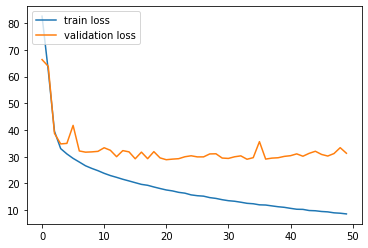

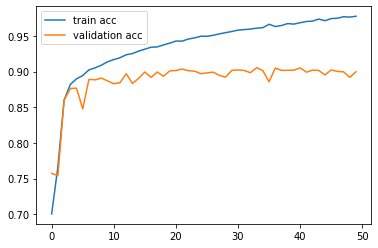

In [48]:
# HINT: note that your training time should not take many days. You may consider training on GPU.
 
# TODO:
# Pick your hyper parameters
max_epoch = 50
train_batch = 32
test_batch = 32
learning_rate = 0.003
 
use_gpu = torch.cuda.is_available()
 
X_train_dataset, X_vald_dataset, y_train_dataset, y_vald_dataset, test_x, label2name, test_y = create_dataset( q2_dataset_path, 'CNN')
# Create train dataset loader
train_dataset = FashionMNISTDataset(X_train_dataset, y_train_dataset)
train_loader = DataLoader(train_dataset, batch_size=train_batch, shuffle=True)
 
# Create validation dataset loader
vald_dataset = FashionMNISTDataset(X_vald_dataset, y_vald_dataset)
vald_loader = DataLoader(vald_dataset, batch_size=train_batch)
 
# Create test dataset loader
test_dataset = FashionMNISTDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, batch_size=test_batch)
 
# initialize your network
model = CNN()
 
if use_gpu:
  model.cuda()

# define loss function
criterion = nn.CrossEntropyLoss()
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
lLoss = 0
FinalLossTrain=[]
FinalLossValid=[]
FinalAccTrain=[]
FinalAccValid=[]
check_for = 0
for epoch in range(max_epoch):
  ###############################################333
  model=model.train()
  j=0
  lossesList = np.zeros(train_dataset.__len__())
  preds=[]
  actuals = []
  for index, (data, labels) in enumerate(train_loader):
    if use_gpu:
      data = data.cuda()
      labels = labels.cuda()
    optimizer.zero_grad()
    y_pred = model(data.float())
    predicted = np.array((y_pred).cpu().detach())
    for x in predicted:
      preds.append(np.argmax(x))
 
    #one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),10)
    #print(y_pred.is_cuda)
    #print(one_hot.to(torch.float).is_cuda)
 
   # loss  = criterion(y_pred, one_hot.to(torch.float))
    loss  = criterion(y_pred, labels)
    
    loss.backward()
    optimizer.step()
    
    actual = np.array(labels[:].unsqueeze(1).cpu().detach())
    
    what = 0
    nope = 0
    for _ in actual:     
      if actual[what] == np.argmax(predicted[what]):
        nope += 1
      what += 1
    accuracies = nope/what
    losses = np.mean(np.array(loss.cpu().detach()))
    
    
    for x in actual:
      actuals.append(x)
    
    lossesList[j*train_batch:(j+1)*train_batch] = losses
    
    j=j+1 
 
  what = 0
  nope = 0
  #print(lossesList)
  for _ in actuals:
    if actuals[what][0] == preds[what]:
      nope += 1
    what += 1
  acc = nope/what
 
  #print("iteration end: ", check_for," acc: ", acc*100)
  ########################################################
#    iterate over training batches
#    ...
 
#    Validation
  model = model.eval()
  criterions = nn.CrossEntropyLoss()
  lossesListV = np.zeros(vald_dataset.__len__())
  predictedsV=[]
  actualsV = []
  j=0
  with torch.no_grad():
    for index, (data, labels) in enumerate(vald_loader):
      #print(data.is_cuda)
      #print(labels.is_cuda)
      if use_gpu:
        data = data.cuda()
        labels = labels.cuda()
      #print(labels)
      y_pred = (model(data.float()))
      predicted =np.array((y_pred).cpu().detach())
      actual = np.array(labels[:].unsqueeze(1).cpu().detach())
      for x in predicted:
        predictedsV.append(np.argmax(x))
      for x in actual:
        actualsV.append(x)
      
      #one_hotV = torch.nn.functional.one_hot(labels.to(torch.int64),10)
      #lossV  = criterion(y_pred, one_hotV.to(torch.float))
      lossV = criterion(y_pred, labels)
      lossesV = np.mean(np.array(lossV.cpu().detach()))
      lossesListV[j*train_batch:(j+1)*train_batch] = lossesV
      j=j+1   
      what = 0
      nope = 0
      
      for _ in actual:
        if actual[what] == np.argmax(predicted[what]):
          nope += 1
        what += 1
      accuracies = nope/what
    
    what = 0
    nope = 0
    
    for _ in actualsV:
      if actualsV[what][0] == predictedsV[what]:
        nope += 1
      what += 1
    accV = nope/what
    
 
  FinalLossTrain.append(np.mean(lossesList)*100)
  FinalLossValid.append(np.mean(lossesListV)*100)
  FinalAccTrain.append(acc)
  FinalAccValid.append(accV)
#     iterate over validation batches
  if accV > lLoss:
    torch.save(model, 'best_cnn.pth')
    lLoss = accV
 
  
  #print("iteration end: ", check_for," accV: ", accV*100)
  check_for += 1
# plot losses vs epoch 
# ...
# plt.show()
plt.figure()
plt.plot(FinalLossTrain, label='train loss')
plt.plot(FinalLossValid, label='validation loss')
plt.legend(loc="upper left")
#print(FinalLossTrain)
#print(FinalLossValid)
# plot accuracies vs epoch
# ...
# plt.show()
plt.figure()
plt.plot(FinalAccTrain, label='train acc')
plt.plot(FinalAccValid, label='validation acc')
plt.legend(loc="upper left")

### Model Testing [10 pts]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Accuracy for each class
4. Macro Precision
5. Macro Recall
6. Macro F1 Score

You may plot the heatmap for the confusion matrix using <b>plot_cm</b> function provided below. 



In [49]:
def plot_cm(cm, class_labels):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=range(len(class_labels)),
           yticks=range(len(class_labels)),
           xticklabels=class_labels, yticklabels=class_labels,
           title="Confusion Matrix",
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#### Test MLP [3 pts].


Mean Loss: 91.4390720275879 
Mean Acc: 59.48 
Mean Macro Precision: 67.87840572721153 
Mean Macro Recall: 59.48 
Mean Macro F1 Score: 57.59610131087014


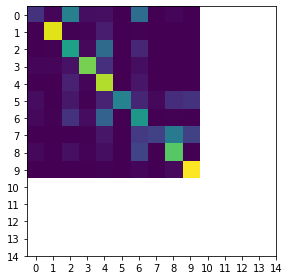

In [50]:
# TODO: 
# load trained model
# test the model by iterating over test batches
# calculate and print performance metrics
# plot confusion matrix using class names instead of class labels
X_train_dataset, X_vald_dataset, y_train_dataset, y_vald_dataset, test_x, label2name, test_y = create_dataset( q2_dataset_path, 'MLP')
# Create train dataset loader
train_dataset = FashionMNISTDataset(X_train_dataset, y_train_dataset)
train_loader = DataLoader(train_dataset, batch_size=train_batch, shuffle=True)
 
# Create validation dataset loader
vald_dataset = FashionMNISTDataset(X_vald_dataset, y_vald_dataset)
vald_loader = DataLoader(vald_dataset, batch_size=train_batch)
 
# Create test dataset loader
test_dataset = FashionMNISTDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, batch_size=test_batch)


best_path = "best_mlp.pth"
model = torch.load(best_path)
use_gpu = torch.cuda.is_available()


# evaluate on test set
model = model.eval()
if use_gpu:
  model.cuda()

criterions = nn.CrossEntropyLoss()
lossezZ = np.zeros(test_dataset.__len__())
predictedsZ=[]
actualsZ = []
j=0
with torch.no_grad():
  for _ , (data, labels) in enumerate(test_loader):
    if use_gpu:
      data = data.cuda()
      labels = labels.cuda()
    #print(labels)
    y_pred = (model(data.float()))
    predicted =np.array((y_pred).cpu().detach())
    actual = np.array(labels[:].unsqueeze(1).cpu().detach())
    for x in predicted:
      predictedsZ.append(np.argmax(x))
    for x in actual:
      actualsZ.append(x)
    
    #lossezZ.append(np.array(criterions(y_pred, labels.unsqueeze(1)).cpu().detach()))
    #one_hotZ = torch.nn.functional.one_hot(labels.to(torch.int64),10)
    #lossZ  = criterion(y_pred, one_hotZ.to(torch.float))
    lossZ = criterion(y_pred, labels)
    lossesZ = np.mean(np.array(lossZ.cpu().detach()))
    lossezZ[j*train_batch:(j+1)*train_batch] = lossesZ
    j=j+1   
    what = 0
    nope = 0
    
    for _ in actual:
      if actual[what] == np.argmax(predicted[what]):
        nope += 1
      what += 1
    accuracies = nope/what
  
  what = 0
  nope = 0
  
  for _ in actualsZ:
    if actualsZ[what][0] == predictedsZ[what]:
      nope += 1
    what += 1
  accZ = nope/what

  
  conf_matrix = (confusion_matrix(actualsZ, predictedsZ))
  acc = accuracy_score(actualsZ, predictedsZ) *100
  pre = precision_score(actualsZ, predictedsZ,average='macro') *100
  recall = recall_score(actualsZ, predictedsZ,average='macro') *100
  f1 = f1_score(actualsZ, predictedsZ,average='macro') *100
  lossesd = np.mean(lossezZ)
  #print(metrics.classification_report(actualsZ, predictedsZ, digits=3))
  # print("confusion matrix: ",dd)
  # print("f1 score: ",f1_score(actualsZ, predictedsZ,average='macro') *100) 
  # print("macro prescion: ",precision_score(actualsZ, predictedsZ,average='macro') *100)
  # print("macro recall: ",recall_score(actualsZ, predictedsZ,average='macro') *100)
  # print("accuracy: ",accuracy_score(actualsZ, predictedsZ) *100)
  #print("nahi",nahi)
  #print("loader len",val_loader.__len__())
  #print("act",actualsV)
  #print("pre",predictedsV)
  
#   iterate over test batches
#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

# print metrics
print("Mean Loss:", lossesd, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

fig.tight_layout()
plt.show()

#### Test CNN [7 pts]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Loss: 0.5020261918067932 
Mean Acc: 81.74 
Mean Macro Precision: 76.56094957845322 
Mean Macro Recall: 81.74000000000001 
Mean Macro F1 Score: 78.46866316142899


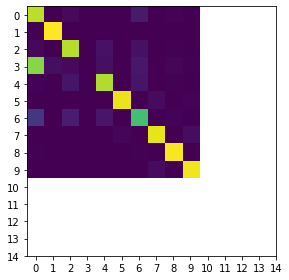

In [ ]:
# TODO: 
# load trained model
# test the model by iterating over test batches
# calculate and print performance metrics
# plot confusion matrix using class names instead of class labels
X_train_dataset, X_vald_dataset, y_train_dataset, y_vald_dataset, test_x, label2name, test_y = create_dataset( q2_dataset_path, 'MLP')
# Create train dataset loader
train_dataset = FashionMNISTDataset(X_train_dataset, y_train_dataset)
train_loader = DataLoader(train_dataset, batch_size=train_batch, shuffle=True)
 
# Create validation dataset loader
vald_dataset = FashionMNISTDataset(X_vald_dataset, y_vald_dataset)
vald_loader = DataLoader(vald_dataset, batch_size=train_batch)
 
# Create test dataset loader
test_dataset = FashionMNISTDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, batch_size=test_batch)


best_path = "best_cnn.pth"
model = torch.load(best_path)
use_gpu = torch.cuda.is_available()


# evaluate on test set
model = model.eval()
if use_gpu:
  model.cuda()

criterions = nn.CrossEntropyLoss()
lossezZ = np.zeros(test_dataset.__len__())
predictedsZ=[]
actualsZ = []
j=0
with torch.no_grad():
  for _ , (data, labels) in enumerate(test_loader):
    if use_gpu:
      data = data.cuda()
      labels = labels.cuda()
    #print(labels)
    y_pred = (model(data.float().unsqueeze(1)))
    predicted =np.array((y_pred).cpu().detach())
    actual = np.array(labels[:].unsqueeze(1).cpu().detach())
    for x in predicted:
      predictedsZ.append(np.argmax(x))
    for x in actual:
      actualsZ.append(x)
    
    #lossezZ.append(np.array(criterions(y_pred, labels.unsqueeze(1)).cpu().detach()))
    #one_hotZ = torch.nn.functional.one_hot(labels.to(torch.int64),10)
    #lossZ  = criterion(y_pred, one_hotZ.to(torch.float))
    lossZ = criterion(y_pred, labels)
    lossesZ = np.mean(np.array(lossZ.cpu().detach()))
    lossezZ[j*train_batch:(j+1)*train_batch] = lossesZ
    j=j+1   
    what = 0
    nope = 0
    
    for _ in actual:
      if actual[what] == np.argmax(predicted[what]):
        nope += 1
      what += 1
    accuracies = nope/what
  
  what = 0
  nope = 0
  
  for _ in actualsZ:
    if actualsZ[what][0] == predictedsZ[what]:
      nope += 1
    what += 1
  accZ = nope/what

  
  conf_matrix = (confusion_matrix(actualsZ, predictedsZ))
  acc = accuracy_score(actualsZ, predictedsZ) *100
  pre = precision_score(actualsZ, predictedsZ,average='macro') *100
  recall = recall_score(actualsZ, predictedsZ,average='macro') *100
  f1 = f1_score(actualsZ, predictedsZ,average='macro') *100
  lossesd = np.mean(lossezZ)
  #print(metrics.classification_report(actualsZ, predictedsZ, digits=3))
  # print("confusion matrix: ",dd)
  # print("f1 score: ",f1_score(actualsZ, predictedsZ,average='macro') *100) 
  # print("macro prescion: ",precision_score(actualsZ, predictedsZ,average='macro') *100)
  # print("macro recall: ",recall_score(actualsZ, predictedsZ,average='macro') *100)
  # print("accuracy: ",accuracy_score(actualsZ, predictedsZ) *100)
  #print("nahi",nahi)
  #print("loader len",val_loader.__len__())
  #print("act",actualsV)
  #print("pre",predictedsV)
  
#   iterate over test batches
#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

# print metrics
print("Mean Loss:", lossesd, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

fig.tight_layout()
plt.show()

### Model Comparison [20 pts]

Answer the following questions. Your answers <b>must not exceed 200 words</b> in total. Provide the reasoning for your claims:
<ul>
<li> Discuss the figures that you have plotted in <b>Model Training</b> section
<li> In theory, are both models suitable for processing image data? Discuss. </li>
<li> Which model performed better on the test set? Do results support your claim for the previous question? Discuss. </li>
<li> Which measure/metric (among the ones you considered for this question) would you prefer to assess a model trained for multi-class classification task?
<li> Compare both models in terms of complexity.
<li> Comment on the inter-class similarity based on your results.
</ul>

In theory yes both models are suitable for processing image data, however with MLP being more complex ; the number of total parameters can grow to very high (number of perceptron in layer 1 multiplied by # of p in layer 2 multiplied by # of p in layer 3…). This is inefficient because there is redundancy in such high dimensions. Another disadvantage is that it disregards spatial information. It takes flattened vectors as inputs. Another disadvantage is that there are too many connections betwee nthe nodes forming a dense web


The panning of filters (you can set the stride and filter size ) in CNN essentially allows parameter sharing, weight sharing so that the filter looks for a specific pattern, and is location invariant — can find the pattern anywhere in an image. This is very useful for object detection. Patterns can be discovered in more than one part of the image.

Lastly, comparing the metric of accuracy on the test sets on both the models, it can be deduced that the CNN is a far better model even though both models train to give high accuracy but CNN gives a better mean loss and accuracy metrics.

## References
1.	https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594
2.	https://towardsdatascience.com/effect-of-gradient-descent-optimizers-on-neural-net-training-d44678d27060
3.	https://medium.com/analytics-vidhya/exploring-batch-normalisation-with-pytorch-1ac25229acaf
4.	https://towardsdatascience.com/convolutional-neural-network-17fb77e76c05
